# Pore and Surface Diffusion Model (PSDM)

Originally developed by Michigan Technological University, coded in Python by USEPA

This can be used to model granular activated carbon (GAC) systems.

# 5.3 Pilot modelling of compound PFHpA

## 5.3.2 Estimation of isotherm parameters

author: Jonathan Burkhardt @UCChEJBB,
         Levi Haupert
         
PFHpA data from article: 

*Modeling PFAS Removal Using Granular Activated Carbon for Full-Scale System Design*
         
edit: Mathieu Coghe, highlighted by *//Mathieu* (Ctrl+F)

In [1]:
## Import Required Packages
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import pylab as plt

import os
srt_dir = os.getcwd()

import PSDM
os.chdir(srt_dir)

In [2]:
fn = '5.3.2_Input_PFHpA.xlsx'

chem_data = PSDM.process_input_data(fn, sheet_name='Properties') 
k_data = pd.read_excel(fn, sheet_name='Kdata',index_col=0) # K & 1/n data

raw_data, column_info,\
compounds, carbons, = PSDM.process_input_file(fn,\
                                               data_sheet='data',\
                                               column_sheet='columnSpecs'
                                              )

Demonstrating Fitting Capabilities.

Using "data_optimize" sheet, which contains time series of effluent breakthrough.

In [3]:
#reset files, just in case
chem_data = PSDM.process_input_data(fn, sheet_name='Properties') 
k_data = pd.read_excel(fn, sheet_name='Kdata',index_col=0) # K & 1/n data


raw_data, column_info,\
compounds, carbons, = PSDM.process_input_file(fn,\
                                               data_sheet='data_optimize',\
                                               column_sheet='columnSpecs'
                                              )
## note data_sheet is now 'data_optimize'

chem_type = 'PFAS'
water_type = 'Rhine'

PFHpA
          PFHpA
K      2.387310
1/n    0.450000
q      0.438922
brk   91.000000
AveC   0.023201
Running - PFHpA
          PFHpA
K      6.280604
1/n    0.580000
q      0.438922
brk   91.000000
AveC   0.023201


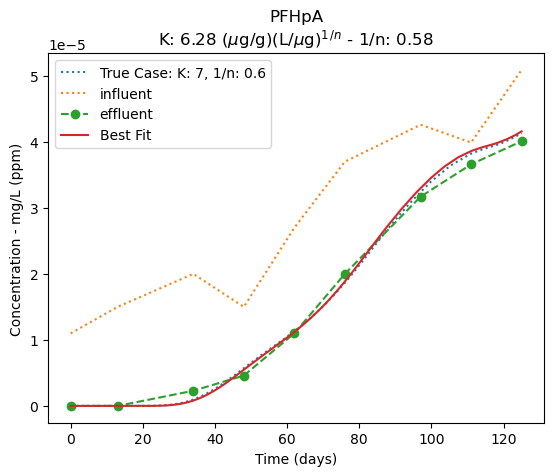

In [4]:
## This step can take a few minutes
for comp in compounds:
    print(comp)
    column = PSDM.PSDM(column_info[carbons[0]], 
                   chem_data, 
                   raw_data,
                   nr=8,
                   nz=12, 
                   #k_data=k_data,
                   chem_type=chem_type,
                   water_type=water_type,
                   optimize=False
                   )
    
    print(column.k_data)

    column.test_range = np.array([k_data[comp]['K']])
    column.xn_range = np.array([k_data[comp]['1/n']])
    
    # RUNNING the simulation
    # only results is used in this example
    _compound, _k, _xn, _ssqs, results = column.run_psdm_kfit(comp)
    
    # print(results['data'][np.linspace(0,175,36)])
    
    plt.plot(results.index, 
             results.values/1000,':',
             label=f'True Case: K: {k_data[comp]["K"]:,.0f}, 1/n: {k_data[comp]["1/n"]}'
             )
    plt.plot(raw_data.index,
             raw_data[column_info[carbons[0]]['influentID']][comp].values/1000,
             label='influent',ls=':')
    plt.plot(raw_data.index,
             raw_data[carbons[0]][comp].values/1000.,
             label='effluent', marker='o',ls='--')
    
    
    column.xn_range = np.linspace(.3,.75,19) # increment 0.025
    # checks +/- 30% of estimated K (pm=30), 
    # and scans 1/n space in 0.01 step sizes (des_xn=0.01)
    column.run_all_smart(pm=30, des_xn=0.01)
    
    #Best fit was saved back to column.k_data
    print(column.k_data)
    
    _compound, k, xn, _ssqs, results2 = column.run_psdm_kfit(comp)
    
    plt.plot(results2.index,
             results2.values/1000.,
             label='Best Fit')
    
    
    # Plot Labels, etc.
    plt.legend()
    plt.title(f'{comp}\nK: {k:,.2f} ($\mu$g/g)(L/$\mu$g)$^1$$^/$$^n$ - 1/n: {xn:.3}')
    plt.xlabel(f'Time ({column_info.loc["time"].values[0]})')
    plt.ylabel('Concentration - mg/L (ppm)')
    plt.savefig(comp+'_'+carbons[0]+'_example3.png', dpi=300)


In [5]:
column.psdm_teller

23

In [6]:
raw_data

type,influent,F400
compound,PFHpA,PFHpA
time,,
0,0.0110,0.0000
13,0.0150,0.0000
34,0.0200,0.0023
48,0.0150,0.0046
62,0.0270,0.0110
76,0.0370,0.0200
97,0.0426,0.0317
111,0.0399,0.0366


In [7]:
column.psdm_Ds

PFHpA    5.433223e-20
dtype: float64

In [8]:
column.mass_transfer

,PFHpA
kf,0.0
dp,0.0
ds,0.0


In [9]:
chem_data

,PFHpA
MW,364.060
MolarVol,203.158
BP,175.000
Density,1.792
Solubility,0.000
VaporPress,0.000
